Today's topic is **KMeans Clustering**<br>
___
It is an algorithm of Unsupervised Machine Learning that is used for data clusterization.<br>
The thing is we can divide all our datapoints on *clusters* where *cluster* means set of datapoints with simmilar variable values.<br>

**Input Data**<br>
We take Matrix $X$ as our input value and output $y$ vector, where for each datapoint we set it's cluster.
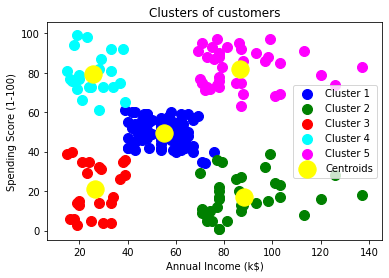

In [46]:
import numpy as np  # we need it to simplify calculations
import matplotlib.pyplot as plt  # we need it to plot our data

Format of code pieces:<br>
I will gradually add methods and calculations with explanations<br>
As a result we will get fully working class of KMeans!

### Step 1.
#### **Initialization**

In this step we initialize our variables.<br>
K - number of clusters (we specify number of clusters)<br>
Centroids - location of centroids* (None in init)<br>

*centroid -  arithmetic mean position of all the datapoints

In [47]:
class KMeans:
  def __init__(self, k=3):
    self.k = k
    self.centroids = None

### Step 2

#### **Randomly initialize Centroids position**

Yeah... Despite the fact I said our position is random, in my opinion it's just smart to set limits. It's silly to use random position, as this starting position may be REALLY far away from our clusters.<br>
In order to avoid it (it's not actually that scary, but still) I would prefer to generate random position with limits.<br>


```python
np.random.uniform()
``` - method for generating random values in uniform distribution (meaning all values are equally likely to be picked).<br>
In such way we set limits to our centroids positions.

In [48]:
class KMeans:
  def __init__(self, k=3):
    self.k = k
    self.centroids = None

  def fit(self, X):
    self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))  # initialize random position for centroids

### Step 3
#### **Calculate distance between datapoint and centroids**

Next step of algorithms is distances calculation.<br>
We calculate our distances as Euclidean Distances<br>
This distance calculation is based on Pythagorean Theorem<br>
**For 2 dimensions it looks like:**
$$\sqrt{△x^2+ △y^2}$$

But in general it's:

$$\sqrt{ ∑{(A_i - B_i)^2}}$$

Then we classify our datapoint to the nearest cluster.<br>
In such way y is a vector of cluster numbers for each datapoint

In [49]:
class KMeans:
  def __init__(self, k=3):
    self.k = k
    self.centroids = None

  def fit(self, X, max_iters, threshold):
    self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))  # initialize random position for centroids

    for _ in range(max_iters):
      y = []

      for datapoint in X:
        distances = self.calculate_distance(datapoint, self.centroids)
        cluster = np.argmin(distances)
        y.append(cluster)
      y = np.array(y)

  @staticmethod
  def calculate_distance(datapoint, centroids):
    print(datapoint - centroids ** 2)
    return np.sqrt(np.sum((datapoint - centroids) ** 2, axis=1))

### Step 4
#### **Relocate Centroids**

Alright... Now it's key thing.<br>
After classifying all datapoints as particular cluster element we can set it's centroids to the mean position of all the datapoints!<br>
1. As you can see I created array of indices per cluster (index represents cluster and value of this index represents all dots classified as this cluster element)
2. I enumerate these k clusters:<br>
.1 If we have 0 datapoints for cluster we simply leave it untouched<br>
.2 Otherwise we calculate mean for all our datapoints coordinates

In [50]:
class KMeans:
  def __init__(self, k=3):
    self.k = k
    self.centroids = None

  def fit(self, X, max_iters, threshold):
    self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))  # initialize random position for centroids

    for _ in range(max_iters):
      y = []

      for datapoint in X:
        distances = self.calculate_distance(datapoint, self.centroids)
        cluster = np.argmin(distances)
        y.append(cluster)
      y = np.array(y)

      indices_per_cluster = []

      for cluster in range(self.k):
        indices_per_cluster.append(np.argwhere(y == cluster))

      centrals = []
      for i, cluster_indices in enumerate(indices_per_cluster):
        if len(cluster_indices) == 0:
          centrals.append(self.centroids[i])
        else:
          centrals.append(np.mean(X[cluster_indices], axis=0)[0])

  @staticmethod
  def calculate_distance(datapoint, centroids):
    print(datapoint - centroids ** 2)
    return np.sqrt(np.sum((datapoint - centroids) ** 2, axis=1))

### Step 5
#### **Check goal achievement**

If we already achieved our goal (located centroids as centroids of particular cluster) we can stop (it's meaningless to change position by 0.00000001 etc.)<br>
After this check we update our centroids as calculated centrals (we relocate centroids)

In [51]:
class KMeans:
  def __init__(self, k=3):
    self.k = k
    self.centroids = None

  def fit(self, X, max_iters, threshold):
    self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))  # initialize random position for centroids

    for _ in range(max_iters):
      y = []

      for datapoint in X:
        distances = self.calculate_distance(datapoint, self.centroids)
        cluster = np.argmin(distances)
        y.append(cluster)
      y = np.array(y)

      indices_per_cluster = []

      for cluster in range(self.k):
        indices_per_cluster.append(np.argwhere(y == cluster))

      centrals = []
      for i, cluster_indices in enumerate(indices_per_cluster):
        if len(cluster_indices) == 0:
          centrals.append(self.centroids[i])
        else:
          centrals.append(np.mean(X[cluster_indices], axis=0)[0])

      if np.max(abs(self.centroids - np.array(centrals))) < threshold:
        break
      else:
        self.centroids = np.array(centrals)


  @staticmethod
  def calculate_distance(datapoint, centroids):
    print(datapoint - centroids ** 2)
    return np.sqrt(np.sum((datapoint - centroids) ** 2, axis=1))

### Step 6
#### **Predict new data!**
Simple prediction method (identical to that one we were doing in fit)

In [52]:
class KMeans:
  def __init__(self, k=3):
    self.k = k
    self.centroids = None

  def fit(self, X, max_iters, threshold):
    self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))  # initialize random position for centroids

    for _ in range(max_iters):
      y = []

      for datapoint in X:
        distances = self.calculate_distance(datapoint, self.centroids)
        cluster = np.argmin(distances)
        y.append(cluster)
      y = np.array(y)

      indices_per_cluster = []

      for cluster in range(self.k):
        indices_per_cluster.append(np.argwhere(y == cluster))

      centrals = []
      for i, cluster_indices in enumerate(indices_per_cluster):
        if len(cluster_indices) == 0:
          centrals.append(self.centroids[i])
        else:
          centrals.append(np.mean(X[cluster_indices], axis=0)[0])

      if np.max(abs(self.centroids - np.array(centrals))) < threshold:
        break
      else:
        self.centroids = np.array(centrals)

  def predict(self, X):
    y_pred = []

    for datapoint in X:
      distances = self.calculate_distance(datapoint, self.centroids)
      cluster = np.argmin(distances)
      y_pred.append(cluster)
    y_pred = np.array(y_pred)
    return y_pred


  @staticmethod
  def calculate_distance(datapoint, centroids):
    return np.sqrt(np.sum((datapoint - centroids) ** 2, axis=1))

### Step 7
#### Seat Back and Enjoy!
Let's test this baby!

In [53]:
data = np.random.random(size=(1_000, 2))

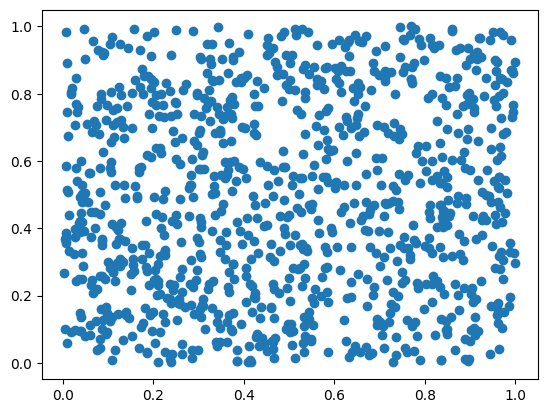

In [54]:
plt.scatter(data[:, 0], data[:, 1]);

In [55]:
model = KMeans(k=10)
model.fit(data, 200, 1e-4)

In [56]:
y_pred = model.predict(data)

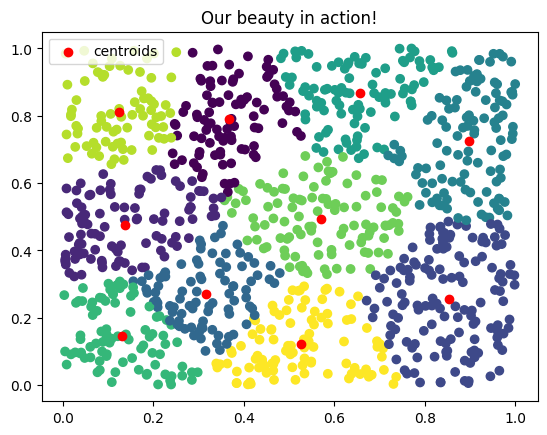

In [57]:
plt.title('Our beauty in action!')
plt.scatter(data[:, 0], data[:, 1], c=y_pred);
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c='red', label='centroids')
plt.legend()
plt.show();

### That's really COOL!

In [58]:
data = np.random.random(size=(5_000, 2))

In [59]:
model = KMeans(k=100)
model.fit(data, 200, 1e-4)

In [60]:
y_pred = model.predict(data)

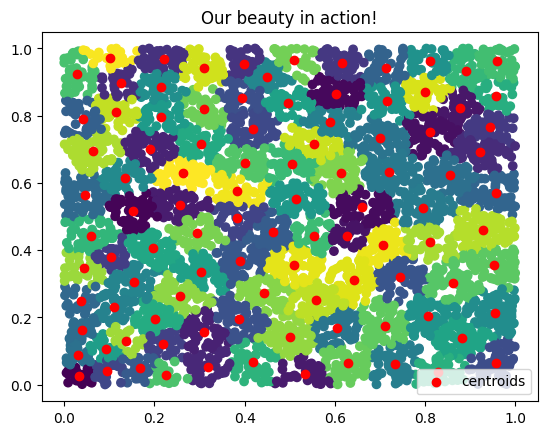

In [61]:
plt.title('Our beauty in action!')
plt.scatter(data[:, 0], data[:, 1], c=y_pred);
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c='red', label='centroids')
plt.legend()
plt.show();

### **ALGORITHM PERFORMED WELL**
<img src='https://media1.tenor.com/m/1Hiu4ZL3t_gAAAAC/cat-cat-meme.gif'>
